In [5]:
#All the basic Imports Needed to Run the application
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [13]:
#Basic Varibales for Data
img_rows, img_cols = 32, 32
batch_size = 16
num_classes = 36

#Declaring Variables for Train and Test Data Directory
train_data_dir = './refined_dataset/train'
validation_data_dir = './refined_dataset/test'

#Data Augmentation to get all the Data in Different Mannner
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.3, height_shift_range=0.3, horizontal_flip=False, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

#Lets Make Generators for getting The Data and Look at Size of dataset
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_rows, img_cols), batch_size=batch_size, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,target_size=(img_rows, img_cols),batch_size=batch_size, class_mode='categorical')

Found 307063 images belonging to 36 classes.
Found 43904 images belonging to 36 classes.


In [3]:
model = Sequential()

# First CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Second CONV-ReLU Layer
model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 4th Set of CONV-ReLU Layers
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# 6th Set of CONV-ReLU Layers
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Max Pooling with Dropout 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# First set of FC or Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second set of FC or Dense Layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Final Dense Layer
model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

In [4]:
#Imports For Training Model
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
import datetime

In [5]:
#Specifying The Tensorboard Log Dirs.
log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + 'Little_VGG'

#Declaring The Callbacks for Keras
checkpoint = ModelCheckpoint(filepath="License_character_recognition_Little_VGG.h5", verbose=1, save_weights_only=True, restore_best_weights = True)
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3,verbose = 1,restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1,  min_delta = 0.00001)
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

#Creaing a List of Callbacks
callbacks = [earlystop, checkpoint, reduce_lr, tensorboard]

# We use a very small learning rate and Compile The Model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.01), metrics = ['accuracy'])

#Declaring Variables for Training Samples and Testing Samples
nb_train_samples = 307063 
nb_validation_samples = 43904
epochs = 30

#Save the results into History Variable to Check after time
history = model.fit_generator(train_generator, steps_per_epoch = nb_train_samples // batch_size, epochs = epochs,callbacks = callbacks,validation_data = validation_generator, validation_steps = nb_validation_samples // batch_size)

# save model architecture as json file
model_json = model.to_json()
with open("MobileNets_character_recognition_VGG.json", "w") as json_file:
    json_file.write(model_json)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
    1/19191 [..............................] - ETA: 0s - loss: 5.4668 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\Majid\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
19191/19191 [==============================] - ETA: 0s - loss: 1.7240 - accuracy: 0.5281
Epoch 00001: saving model to License_character_recognition_Little_VGG.h5
19191/19191 [==============================] - 3154s 164ms/step - loss: 1.7240 - accuracy: 0.5281 - val_loss: 0.7085 - val_accuracy: 0.8168
Epoch 2/30
19191/19191 [==============================] - ETA: 0s - loss: 1.1447 - accuracy: 0.6996
Epoch 00002: saving model to License_character_recognition_Little_VGG.h5
19191/19191 [==============================] - 2460s

In [9]:
#Imports Needed to Print Confusion Matrix
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 87724 images belonging to 36 classes.
Confusion Matrix
[[ 433    0    2 ...    0    0    0]
 [   0  416    4 ...    0    0    0]
 [   0    0  435 ...    0    0    2]
 ...
 [   0    0    0 ... 2826    4    9]
 [   0    3    0 ...    4 2879    4]
 [   0    0    9 ...    5    1 2934]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       452
           1       0.96      0.94      0.95       444
           2       0.94      0.98      0.96       444
           3       0.99      0.99      0.99       431
           4       0.96      0.98      0.97       428
           5       0.96      1.00      0.98       444
           6       0.98      0.99      0.98       440
           7       0.93      0.99      0.96       431
           8       1.00      0.95      0.97       431
           9       0.99      0.98      0.98       432
           A       0.98      0.82      0.89      3205
           B       0.90      0.91      0

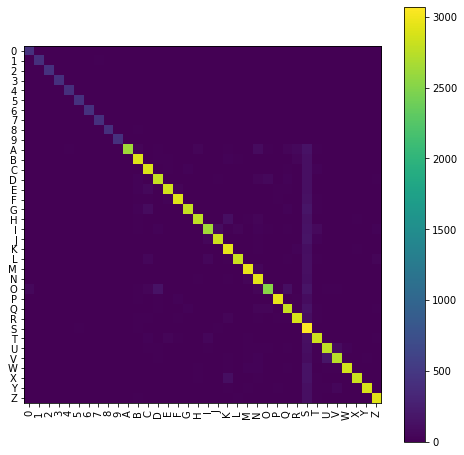

In [17]:
def load_model(path):
        try:
            path = splitext(path)[0]
            with open('%s.json' % path, 'r') as json_file:
                model_json = json_file.read()
            model = model_from_json(model_json, custom_objects={})
            model.load_weights('%s.h5' % path)
            print("Loading model successfully...")
            return model
        except Exception as e:
            print(e)

json_file = open('MobileNets_character_recognition_VGG.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights("License_character_recognition_Little_VGG.h5")

validation_data_dir1 = './refined_dataset/val'
nb_validation_samples1 = 87724

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir1,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples1 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)